In [1]:

import os
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  
  print("Colab: mounting Google drive on ", mount)
  drive.mount(mount, force_remount=True)
  

  # Switch to the directory on the Google Drive that you want to use

  drive_root = mount + "/MyDrive/Adult/2023/coin_detection/"

  # Create drive_root if it doesn't exist
  create_drive_root = False
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: Changing directory to  /content/gdrive/MyDrive/Adult/2023/coin_detection/
/content/gdrive/MyDrive/Adult/2023/coin_detection


In [110]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

# Defining Functions

In [124]:
def find_talls(data, thresh_amp = 0.9, thresh_spacing = 1000):
  print("size of data", data.shape[0])
  peak_indices=[]
  peak_amplitudes=[]
  data_max = data.max()
  for i,x in enumerate(data):
    if x >data_max*thresh_amp:
      if len(peak_indices)==0 or int(thresh_spacing) <(i-peak_indices[-1]):
        peak_amplitudes.append(x)
        peak_indices.append(i)

  return peak_indices, peak_amplitudes

In [5]:
all_wav_files = glob.glob("*.wav")
real_wav_files = []
fake_wav_files = []
for file in all_wav_files:
  if 'FAKE' in file:
    fake_wav_files.append(file)
  else:
    real_wav_files.append(file)


In [129]:
def plot_whole_signal(data, thresh_amp , thresh_spacing):
  peak_indices, peak_amplitudes = find_talls(data, thresh_amp , thresh_spacing )
  time_x =np.linspace(0,data.shape[0]/samplerate, data.shape[0])
  plt.plot(time_x ,  data)
  plt.scatter([x/samplerate for x in peak_indices], peak_amplitudes, color='r')
  plt.title(real_wav_files[0] + " raw data over time")
  plt.xlabel("time s")
  plt.ylabel("signal amplitude")
  return peak_indices, peak_amplitudes

In [147]:
def plot_time_window(data,samplerate, start_ind, window_time=0.02):
  window = int(window_time*samplerate)
  data_first = data[start_ind:start_ind+window]
  plt.plot(np.linspace(0, data_first.shape[0]/samplerate,  data_first.shape[0]), data_first)
  plt.title("plotting {} seconds after strike".format(window_time))
  plt.xlabel("s")

In [133]:

def plot_FFT(data,start_ind, window_time=0.02):
  print("looking at data after strike for ", window_time, "s")
  window = int(window_time*samplerate)
  print("data points being plotted", window)
  data_first = data[start_ind:start_ind+window]
  # Number of sample points
  N = data_first.shape[0]
  # sample freq
  T = 1/samplerate
  x = np.linspace(0.0, N*T, N, endpoint=False)
  #y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
  yf = fft(data_first)
  xf = fftfreq(N, T)[:N//2]
  freq_data = 2.0/N * np.abs(yf[0:N//2])

  f_peak_indices, f_peak_values = find_talls(freq_data, thresh_amp = 30/68, thresh_spacing = 20)

  plt.plot(xf, freq_data)
  plt.scatter([xf[x] for x in f_peak_indices], f_peak_values, color='red')
  plt.title("plotting {} seconds after strike".format(window_time))
  plt.xlabel("frequencies")
  plt.grid()
  return xf, freq_data, f_peak_indices, f_peak_values

# Real Coins

Below you will see the data extracted from a single file from a real coin. 

In [130]:
samplerate, data = wavfile.read(real_wav_files[0])
print("number of data points", data.shape[0])
print("sampling rate", samplerate, "Hz")
print("seconds of data",data.shape[0]/samplerate )

number of data points 965632
sampling rate 48000 Hz
seconds of data 20.117333333333335


<ipython-input-130-ba34d0e8fe74>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(real_wav_files[0])


here we plot the data from the entire file. you can see there are three strikes in the file that I have programmatically picked up and highlighted with red dots

size of data 965632


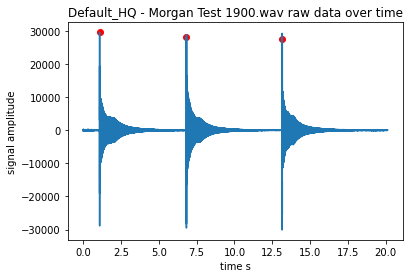

In [132]:
peak_indices, peak_amplitudes= plot_whole_signal(data,  thresh_amp = 0.9, thresh_spacing = 0.25*samplerate)

we'll focus on the first strike and graph it twice in different time scales

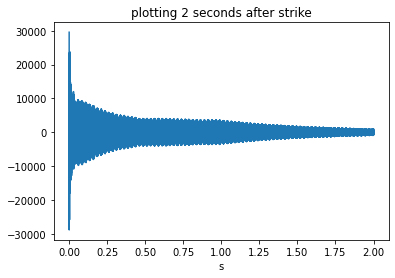

In [75]:
plot_time_window(data,samplerate, peak_indices[0], window_time=2)

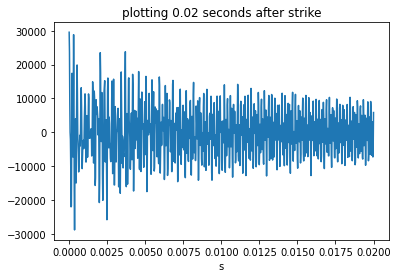

In [72]:
plot_time_window(data,samplerate, peak_indices[0], window_time=0.02)

lets then look at the frequency spectrum of this signal

looking at data after strike for  0.02 s
data points being plotted 960
size of data 480
peak frequencies found at
4450 Hz
8000 Hz
10300 Hz


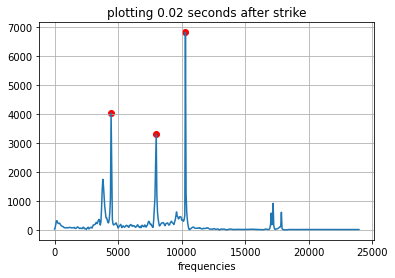

In [134]:
xf, freq_data, f_peak_indices, f_peak_values=plot_FFT(data,peak_indices[0], window_time=0.02)
print("peak frequencies found at")
for ind in f_peak_indices:
  print(round(xf[ind]), "Hz")

# Fake Coin

<ipython-input-152-d903710f19d9>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(fake_wav_files[0])


number of data points 881664
sampling rate 48000 Hz
seconds of data 18.368
size of data 881664


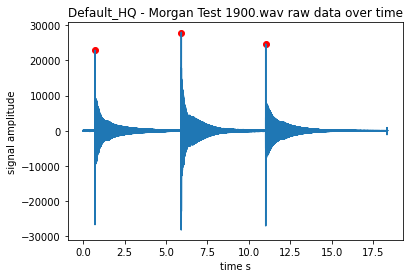

In [152]:
samplerate, data = wavfile.read(fake_wav_files[0])
print("number of data points", data.shape[0])
print("sampling rate", samplerate, "Hz")
print("seconds of data",data.shape[0]/samplerate )
peak_indices, peak_amplitudes = plot_whole_signal(data, thresh_amp=0.7, thresh_spacing=0.2*(samplerate))

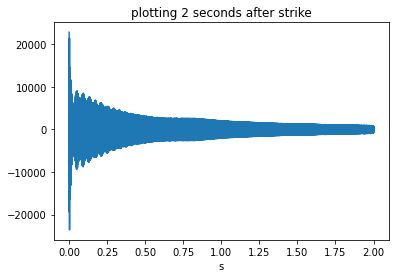

In [153]:
plot_time_window(data,samplerate, peak_indices[0], window_time=2)

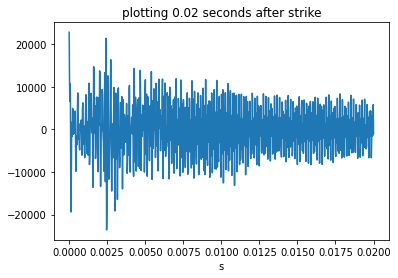

In [154]:
plot_time_window(data,samplerate, peak_indices[0], window_time=0.02)


looking at data after strike for  0.02 s
data points being plotted 960
size of data 480
peak frequencies found at
5600
12350


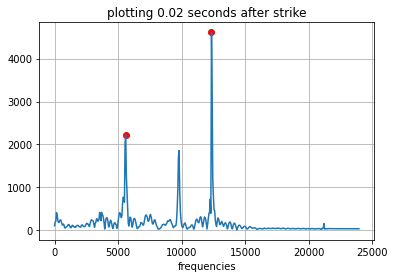

In [155]:
xf, freq_data, f_peak_indices, f_peak_values=plot_FFT(data,peak_indices[0], window_time=0.02)
print("peak frequencies found at")
for ind in f_peak_indices:
  print(round(xf[ind])), "Hz"

# Tracking Results


4450 Hz
8000 Hz
10300 Hz